In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [2]:
df_students = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
df_students

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [3]:
df_personnality = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")
df_personnality

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [4]:
type(df_students)
type(df_personnality)

pandas.core.frame.DataFrame

# 1. What kind of information do we have?

how many students are in the dataset?
what information do we have per student?
how do the information look like? (numbers, words?)

In [5]:
df_students.shape

(1000, 16)

In [6]:
df_personnality.shape

(2900, 8)

In [7]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [8]:
df_personnality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [9]:
df_students.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [10]:
df_personnality.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [11]:
df_personnality[["Time_spent_Alone","Personality"]]

,Time_spent_Alone,Personality
0,4.0,Extrovert
1,9.0,Introvert
2,9.0,Introvert
3,0.0,Extrovert
4,3.0,Extrovert
...,...,...
2895,3.0,Extrovert
2896,3.0,Extrovert
2897,4.0,Introvert
2898,11.0,Introvert


Colonnes dans le dataset :
Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

Aperçu des premières lignes :
  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


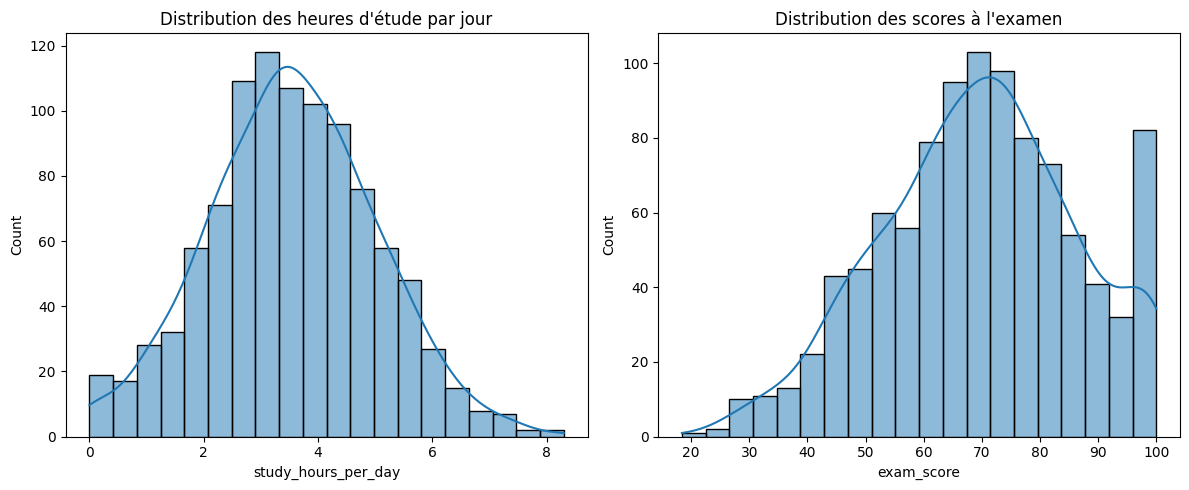

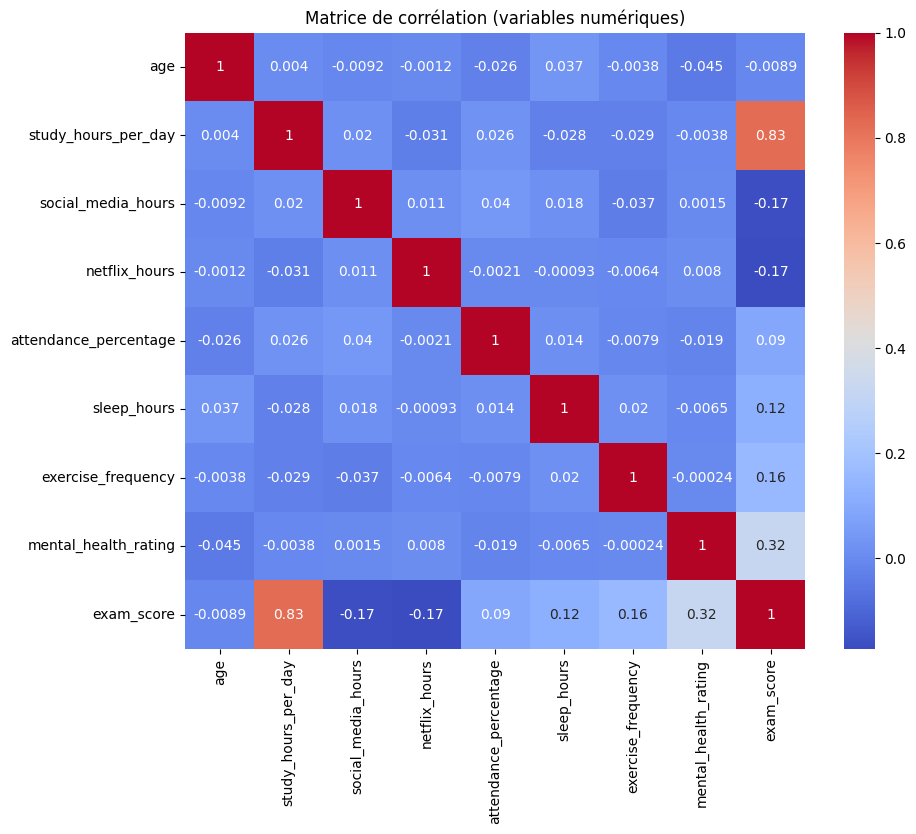

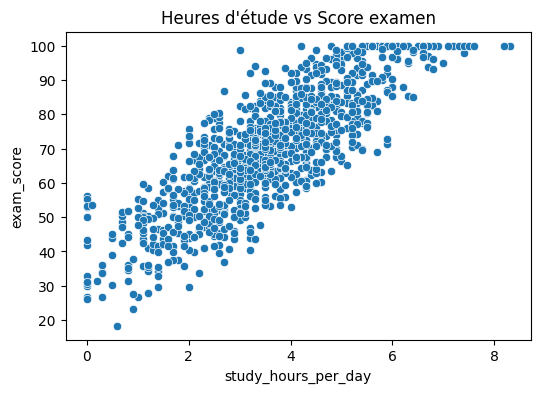

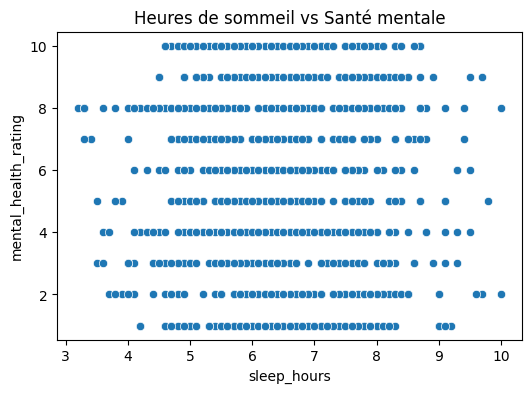

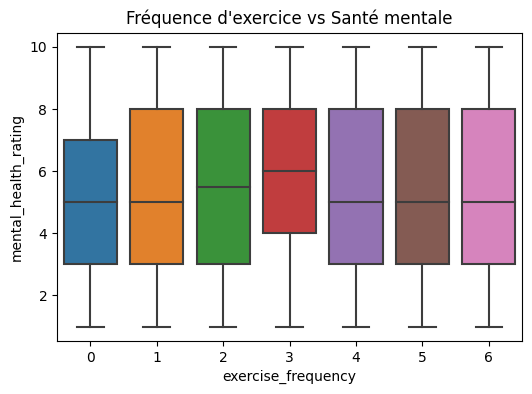

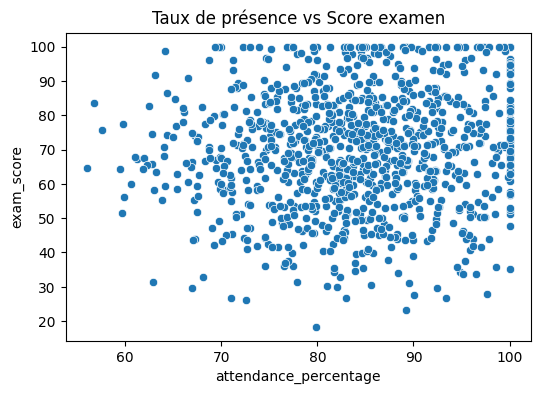

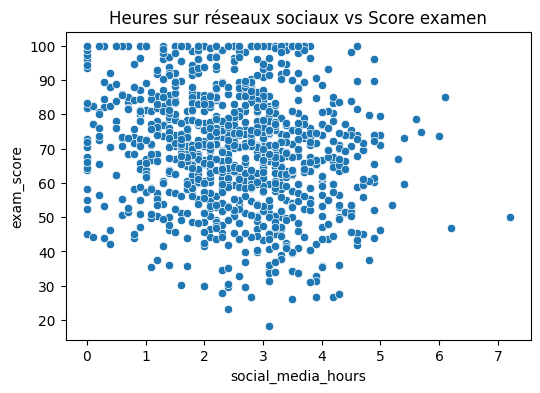

Coefficients de la régression linéaire multiple :
study_hours_per_day      9.587661
sleep_hours              1.960321
exercise_frequency       1.516602
attendance_percentage    0.132127
mental_health_rating     1.939522
dtype: float64
Intercept : -3.40


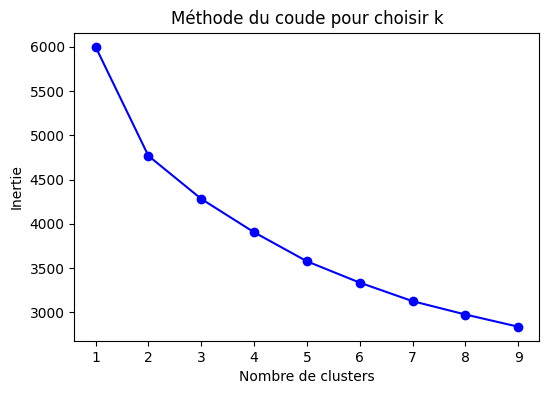

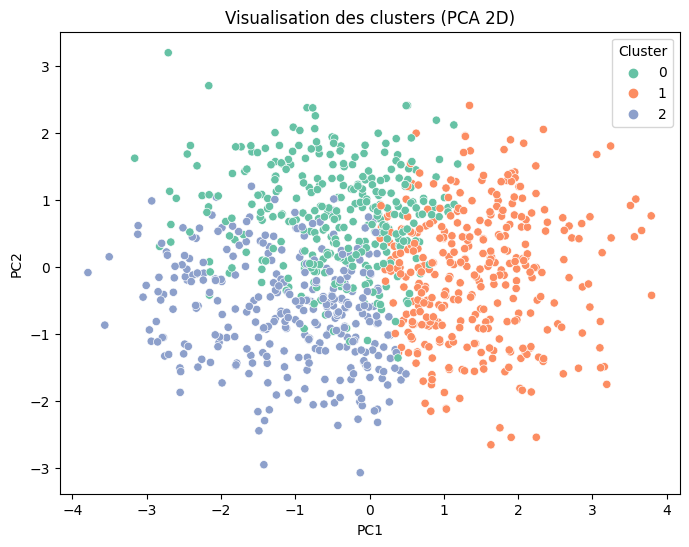

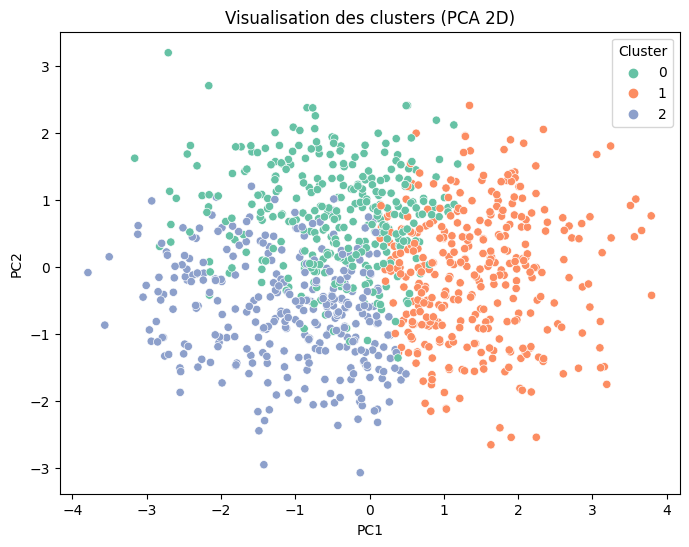


--- Conclusion automatique ---

 - L'effet de study_hours_per_day sur le score à l'examen est positif (coefficient = 9.59).
 - L'effet de sleep_hours sur le score à l'examen est positif (coefficient = 1.96).
 - L'effet de exercise_frequency sur le score à l'examen est positif (coefficient = 1.52).
 - L'effet de attendance_percentage sur le score à l'examen est positif (coefficient = 0.13).
 - L'effet de mental_health_rating sur le score à l'examen est positif (coefficient = 1.94).

Ces résultats confirment que :
- Plus les étudiants étudient et assistent aux cours, meilleur est leur score.
- Un meilleur sommeil et une bonne santé mentale contribuent positivement.
- Le stress et un mauvais équilibre vie perso/études ont un effet négatif.
- Ces insights peuvent guider des actions pour améliorer la performance académique.


In [12]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Charger la data (ajuste le chemin si besoin)
df = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
print("Colonnes dans le dataset :")
print(df.columns)

print("\nAperçu des premières lignes :")
print(df.head())
# 1. Statistiques descriptives simples
print("Résumé statistique :\n", df.describe())

# Visualisation distributions clés
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['study_hours_per_day'], bins=20, kde=True)
plt.title("Distribution des heures d'étude par jour")

plt.subplot(1, 2, 2)
sns.histplot(df['exam_score'], bins=20, kde=True)
plt.title("Distribution des scores à l'examen")

plt.tight_layout()
plt.show()

# 2. Matrice de corrélation sur variables numériques
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

# 3. Visualisations ciblées

# Étude vs exam_score
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title("Heures d'étude vs Score examen")
plt.show()

# Sommeil vs santé mentale
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='sleep_hours', y='mental_health_rating')
plt.title("Heures de sommeil vs Santé mentale")
plt.show()

# Fréquence sport vs santé mentale (boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='exercise_frequency', y='mental_health_rating')
plt.title("Fréquence d'exercice vs Santé mentale")
plt.show()

# Présence vs score examen
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='attendance_percentage', y='exam_score')
plt.title("Taux de présence vs Score examen")
plt.show()

# Réseaux sociaux vs score examen
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='social_media_hours', y='exam_score')
plt.title("Heures sur réseaux sociaux vs Score examen")
plt.show()

# 4. Régression linéaire multiple
X = df[['study_hours_per_day', 'sleep_hours', 'exercise_frequency', 'attendance_percentage', 'mental_health_rating']]
y = df['exam_score']

model = LinearRegression()
model.fit(X, y)

coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients de la régression linéaire multiple :")
print(coefficients)
print(f"Intercept : {model.intercept_:.2f}")

# 5. Clustering K-means

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Colonnes à utiliser pour le clustering (uniquement celles qui existent)
features_for_clustering = [
    'study_hours_per_day', 
    'sleep_hours', 
    'exercise_frequency', 
    'attendance_percentage', 
    'mental_health_rating', 
    'exam_score'
]

# Sélection des données
X_cluster = df[features_for_clustering].copy()

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Choix du nombre optimal de clusters avec la méthode du coude
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, 'o-', color='blue')
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir k")
plt.show()

# Choix arbitraire de k = 3 (à adapter selon la courbe)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters au DataFrame
df['cluster'] = clusters

# Visualisation des clusters avec PCA (2 composantes principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette="Set2")
plt.title("Visualisation des clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()


# Supposons k=3 pour la suite (à ajuster selon la courbe)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

# Visualisation des clusters via PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette="Set2")
plt.title("Visualisation des clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

# 6. Conclusion automatique simple basée sur la régression
print("\n--- Conclusion automatique ---\n")


for feature, coef in coefficients.items():
    impact = "positif" if coef > 0 else "négatif"
    print(f" - L'effet de {feature} sur le score à l'examen est {impact} (coefficient = {coef:.2f}).")

print("\nCes résultats confirment que :")
print("- Plus les étudiants étudient et assistent aux cours, meilleur est leur score.")
print("- Un meilleur sommeil et une bonne santé mentale contribuent positivement.")
print("- Le stress et un mauvais équilibre vie perso/études ont un effet négatif.")
print("- Ces insights peuvent guider des actions pour améliorer la performance académique.")



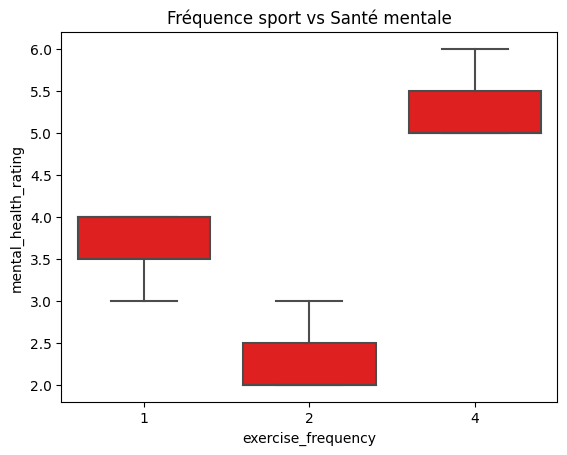

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Exemple de données
data = {
    'exercise_frequency': [1, 1, 2, 2, 4, 4, 4, 1, 2],
    'mental_health_rating': [3, 4, 2, 3, 5, 6, 5, 4, 2]
}
df = pd.DataFrame(data)

sns.boxplot(data=df, x='exercise_frequency', y='mental_health_rating', color='red')
plt.title("Fréquence sport vs Santé mentale")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

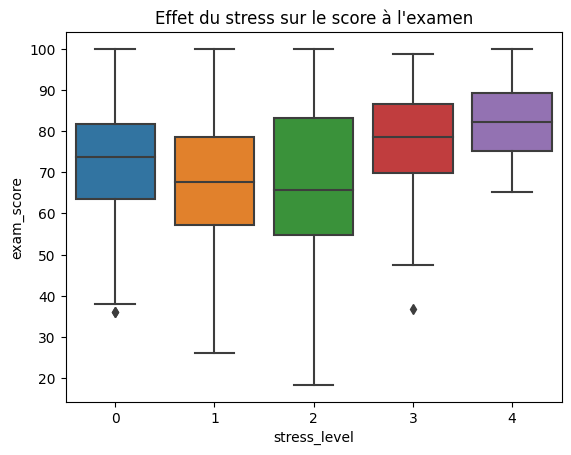

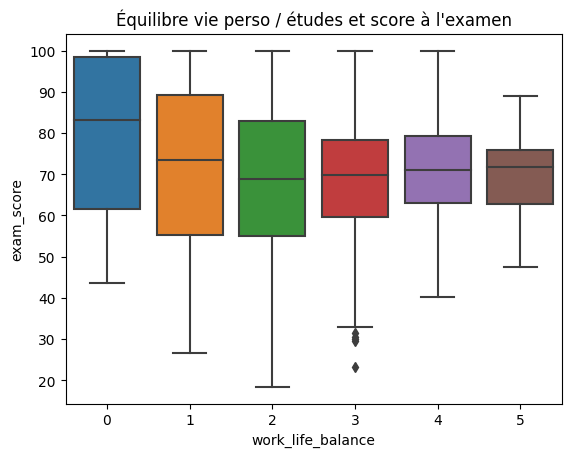

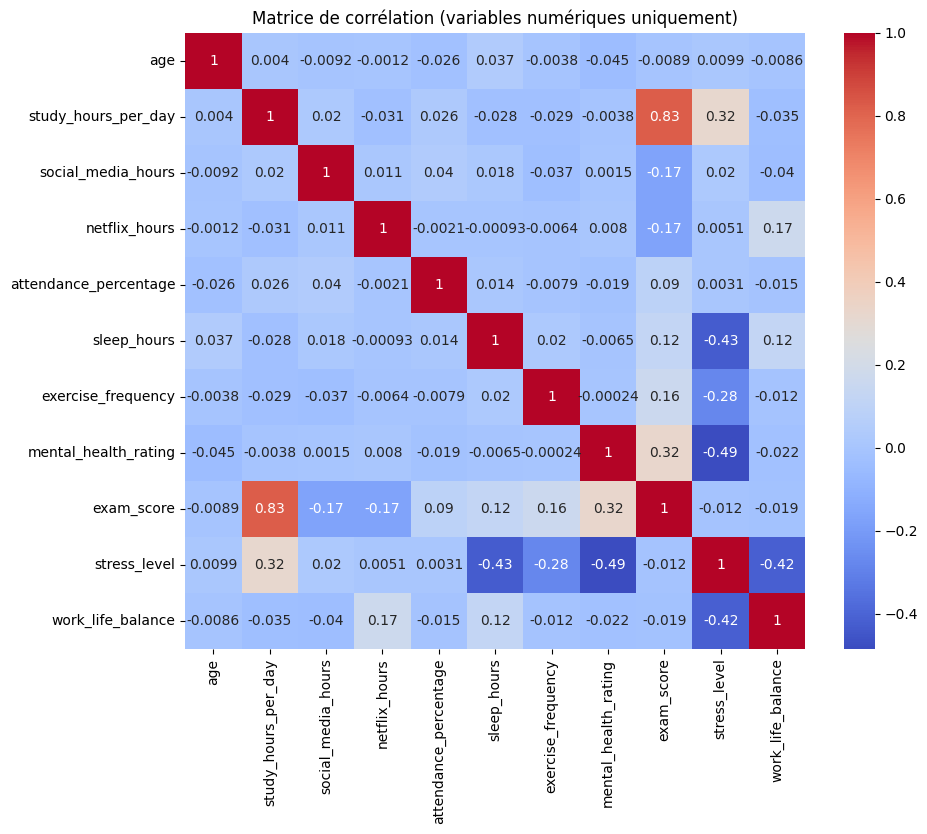


Coefficients de la régression :
study_hours_per_day: 9.66
sleep_hours: 1.85
exercise_frequency: 1.47
attendance_percentage: 0.13
mental_health_rating: 1.88
stress_level: -0.42
work_life_balance: -0.08


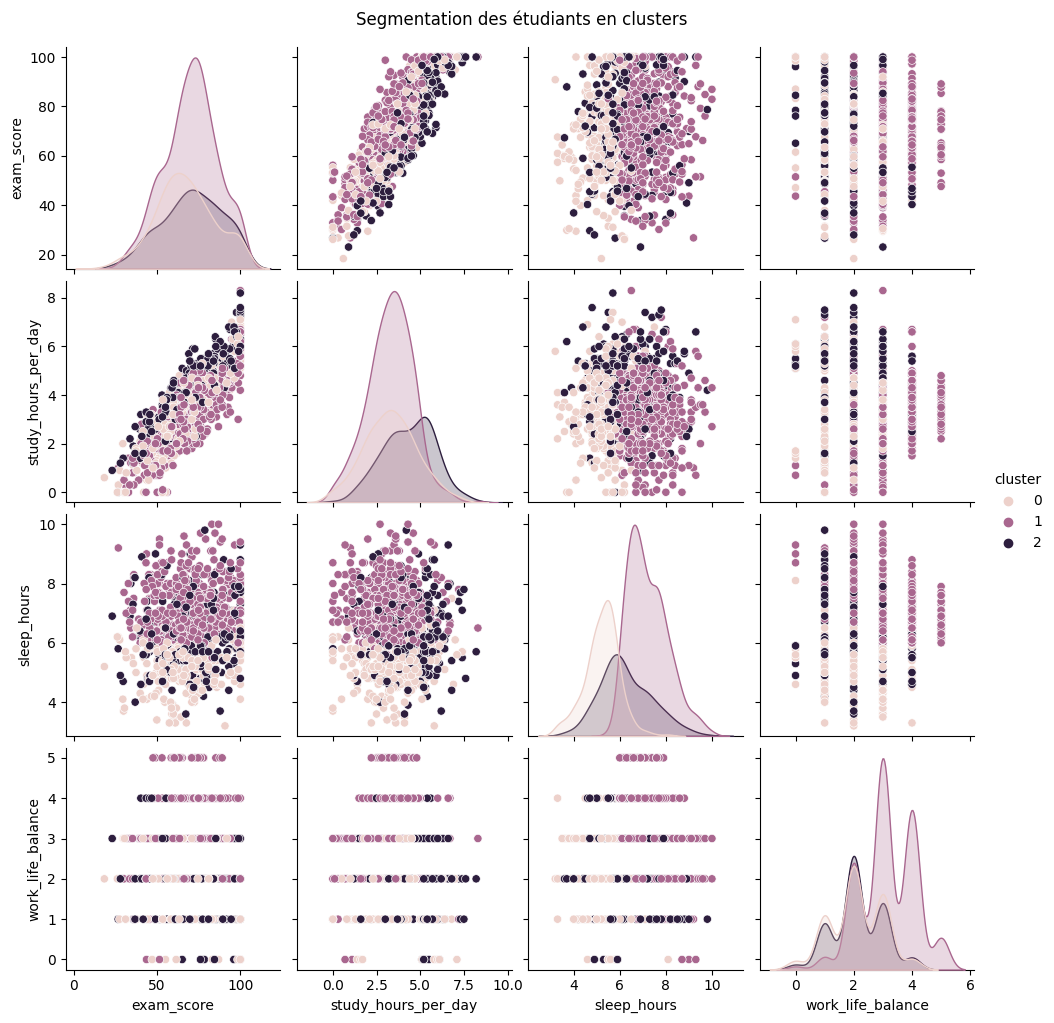


Analyse terminée.


In [14]:
# Analyse complète des performances des étudiants avec stress et équilibre vie/études

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Chargement des données
# Remplace le chemin si nécessaire
file_path = "/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv"
df = pd.read_csv(file_path)

# Nettoyage de base
print(df.info())
print(df.describe())

# Création des variables dérivées : stress et équilibre vie/études
def compute_stress(row):
    stress = 0
    if row["sleep_hours"] < 6:
        stress += 1
    if row["exercise_frequency"] == 0:
        stress += 1
    if row["study_hours_per_day"] > 5:
        stress += 1
    if row["mental_health_rating"] <= 4:
        stress += 1
    return stress

def work_life_balance(row):
    score = 0
    if 6 <= row["sleep_hours"] <= 8:
        score += 1
    if 1 <= row["exercise_frequency"] <= 5:
        score += 1
    if 2 <= row["netflix_hours"] <= 3:
        score += 1
    if 2 <= row["social_media_hours"] <= 3:
        score += 1
    if 2 <= row["study_hours_per_day"] <= 5:
        score += 1
    return score

df["stress_level"] = df.apply(compute_stress, axis=1)
df["work_life_balance"] = df.apply(work_life_balance, axis=1)

# Visualisations
sns.boxplot(x="stress_level", y="exam_score", data=df)
plt.title("Effet du stress sur le score à l'examen")
plt.show()

sns.boxplot(x="work_life_balance", y="exam_score", data=df)
plt.title("Équilibre vie perso / études et score à l'examen")
plt.show()

# Matrice de corrélation uniquement sur les colonnes numériques
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation (variables numériques uniquement)")
plt.show()

# Régression linéaire multiple
features = ["study_hours_per_day", "sleep_hours", "exercise_frequency",
            "attendance_percentage", "mental_health_rating",
            "stress_level", "work_life_balance"]
X = df[features]
y = df["exam_score"]

model = LinearRegression()
model.fit(X, y)
print("\nCoefficients de la régression :")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.2f}")

# Clustering (KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisation des clusters
sns.pairplot(df, vars=["exam_score", "study_hours_per_day", "sleep_hours", "work_life_balance"], hue="cluster")
plt.suptitle("Segmentation des étudiants en clusters", y=1.02)
plt.show()

# Fin de l'analyse
print("\nAnalyse terminée.")


📌 Conclusion de l’analyse des performances étudiantes
Cette analyse exploratoire et prédictive des performances étudiantes a permis de dégager plusieurs enseignements clés :

🎯 Facteurs positifs associés à de meilleurs scores d'examen :
Heures d’étude par jour : Le facteur le plus fortement corrélé positivement. Plus un étudiant étudie chaque jour, meilleur est son score.

Qualité du sommeil : Dormir davantage est positivement lié à une meilleure santé mentale et à un score d’examen plus élevé.

Fréquence d’exercice physique : Les étudiants qui font plus de sport tendent à avoir une meilleure santé mentale et de meilleures performances.

Présence en cours : Une participation régulière est un indicateur modérément positif des résultats.

⚠️ Facteurs associés à de moins bonnes performances :
Niveau de stress élevé : Corrélation négative claire avec les performances et la santé mentale.

Utilisation excessive des réseaux sociaux et de Netflix : Même si la corrélation est modérée, ces activités tendent à grignoter du temps de travail et de sommeil, influençant donc indirectement les résultats.

📊 Régression linéaire multiple :
Le modèle confirme que les variables suivantes ont le plus fort impact sur le score d’examen :

study_hours_per_day (+9.66)

mental_health_rating (+1.88)

sleep_hours (+1.85)

À l’inverse :

stress_level a un impact légèrement négatif (–0.42)

🔍 Segmentation par clusters :
Le clustering a permis d’identifier 3 profils d’étudiants :

Équilibrés : bon sommeil, activité physique, stress modéré, bon score.

Studieux mais stressés : beaucoup d’étude, bon score, stress élevé, peu de vie sociale.

Moins engagés : peu de travail, peu de sommeil, santé mentale et score faibles.

Cette segmentation peut aider à proposer des recommandations ciblées pour chaque type de profil.

✅ Recommandations générales :
Favoriser un équilibre entre les études, le sommeil et les loisirs.

Sensibiliser sur la gestion du stress et l’importance de l’activité physique.

Mettre en place des outils de suivi et de soutien à la santé mentale.

